In [1]:
cities = ['Shah Rukh Khan','Sonia Laskar','Preity Zinta','Bobby Deol','Priyanka Chopra','Angelina Jolie','Anne Hathaway','Nicolas Cage','Amitabh Bacchan','Brad Pitt','Abhishek Bacchan','Ananya Pandey','Saif Ali Khan','Kareena Kapoor','Malaika Arora']

In [2]:
import pandas as pd
import numpy as np 
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

import math

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import glob
import os
from scipy import fft
from mtcnn.mtcnn import MTCNN

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
%matplotlib inline

In [3]:
IPath = 'test/SoniaLaskar_Mask_test.jpg'

[[ 50  70 143 143]]
200 280 572 572
23
(286, 572)
(128, 64)


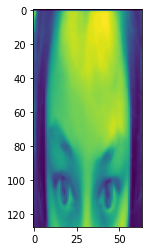

(128, 64)
(128, 64)
8215


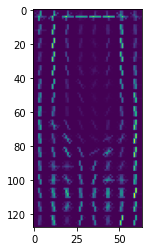

Identified: Female


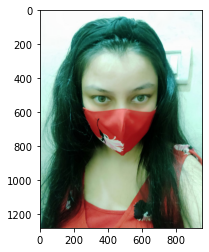

In [4]:
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)



MEAN_IMG = []
FSHIFT_IMG = []
HIST_IMG = []
DCT_IMG = []

x2,y2,w2,h2 = 0,0,0,0

GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

originalImage = cv2.imread(IPath)#(fls) 
#plt.imshow(originalImage, cmap = 'gray')

grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)


H2 = grayImage.copy()
grayImage.resize(180,180)
X = grayImage.flatten()

img = grayImage.copy()

im=cv2.flip(H2,1,1) 



rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
faces = face_cascade.detectMultiScale(rerect_size)



#print(rerect_size)

print(faces)

for f in faces:
    (x, y, w, h) = [v * rect_size for v in f] 

    print(x,y,w,h)

    face_img = im[y:y+h, x:x+w]
    rerect_sized=cv2.resize(face_img,(150,150))
    normalized=rerect_sized/255.0

    label=0

    cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
    cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
    #cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    roi_face=face_img.copy()

    roi_face_half=roi_face[0:int(face_img.shape[0]/2),:]


    #folder_path = os.path.join(folder_path,file_name)

    image_content = roi_face_half.copy()


    

f = np.fft.fft2(roi_face_half)
fshift = np.fft.fftshift(f)

MEAN_IMG.append(roi_face_half.mean())

FSHIFT_IMG.append(fshift.mean())

HIST_IMG.append(np.histogram(roi_face_half)[0])

HI = pd.DataFrame(data = HIST_IMG)

gfg = fft.dct(roi_face_half)

DCT_IMG.append(gfg)

#16 Feature Vectors
FV_LIST = [np.mean(FSHIFT_IMG).real,
   np.mean(FSHIFT_IMG).imag,
   np.mean(MEAN_IMG),
   np.mean(HI).mean(),
   HI.iloc[:,0].mean(),
   HI.iloc[:,1].mean(),
   HI.iloc[:,2].mean(),
   HI.iloc[:,3].mean(),
   HI.iloc[:,4].mean(),
   HI.iloc[:,5].mean(),
   HI.iloc[:,6].mean(),
   HI.iloc[:,7].mean(),
   HI.iloc[:,8].mean(),
   HI.iloc[:,9].mean(),
   np.mean(DCT_IMG).real,
   np.mean(DCT_IMG).imag]

face_half_area = roi_face_half.shape[0]*roi_face_half.shape[1]
        
def shortest_distance(x1, y1, a, b, c):  
    return abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
            
detector = MTCNN()

OI = originalImage.copy()
cv2.resize(OI,(180,180)).shape
# detect faces in the image
faces = detector.detect_faces(OI)#grayImage)
        
try:   
    
    left_eye_distance = shortest_distance(faces[0]['keypoints']['left_eye'][0],
                                                 faces[0]['keypoints']['left_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]))
            
    right_eye_distance = shortest_distance(faces[0]['keypoints']['right_eye'][0],
                                                 faces[0]['keypoints']['right_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]+faces[0]['box'][2]))
        
    
    p1_x = faces[0]['box'][0]
    p1_y = faces[0]['box'][1]

    p2_x = faces[0]['box'][0]+faces[0]['box'][3]
    p2_y = faces[0]['box'][1]

    #print(p1_x,p1_y,p2_x,p2_y)

    #forehead centre

    fhead_x = 0.5*(p1_x+p2_x)
    fhead_y = 0.5*(p1_y+p2_y)
    #print(fhead_x,fhead_y)

    #print(head_x,head_y)
    head_x = 0.5*(faces[0]['keypoints']['left_eye'][0]+faces[0]['keypoints']['right_eye'][0])
    head_y = 0.5*(faces[0]['keypoints']['left_eye'][1]+faces[0]['keypoints']['right_eye'][1])
    #print(head_x,head_y)

    fhead_measure = np.linalg.norm(np.array([fhead_x,fhead_y])-np.array([head_x,head_y]))
    #print(fhead_measure)



    FV_LIST[15] = np.linalg.norm(np.array(faces[0]['keypoints']['left_eye'])-np.array(faces[0]['keypoints']['right_eye']))
    FV_LIST.append(fhead_measure)   
    FV_LIST.append(left_eye_distance)
    FV_LIST.append(right_eye_distance)
    FV_LIST.append(np.std(OI[:,:,0]))
    FV_LIST.append(np.std(OI[:,:,1]))
    FV_LIST.append(np.std(OI[:,:,2]))
    
except:
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    pass

FV_LIST.append(face_half_area)

#resizing image - HOG
print(len(FV_LIST))
print(roi_face_half.shape)
resized_img = resize(roi_face_half, (128,64)) 
print(resized_img.shape)
plt.imshow(resized_img) 
plt.show()
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
            cells_per_block=(2, 2), visualize=True)
# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
print(hog_image_rescaled.shape)

hog_image_rescaled_flat = hog_image_rescaled.flatten()

FV_LIST.extend(hog_image_rescaled_flat)

print(len(FV_LIST))
#print(FV_LIST)

plt.imshow(hog_image_rescaled) 
plt.show()

df = pd.DataFrame(data = [FV_LIST])

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('model_MF.pbz2') 

load_clf = data


prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)

citi = ['Male','Female']

print('Identified:',citi[int(prediction)])

gender = citi[int(prediction)]

gender_code = int(prediction)

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()

[[ 50  70 143 143]]
200 280 572 572
23
(286, 572)
(128, 64)


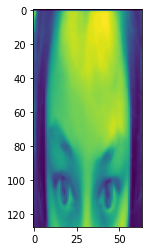

(128, 64)
(128, 64)
8216


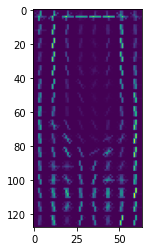

In [5]:
#predict person/ customer

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import glob
import os
from scipy import fft
from mtcnn.mtcnn import MTCNN

#IPath = r"5cd9a2c7db.jpg"

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)



MEAN_IMG = []
FSHIFT_IMG = []
HIST_IMG = []
DCT_IMG = []

x2,y2,w2,h2 = 0,0,0,0

GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

originalImage = cv2.imread(IPath)#(fls) 
#plt.imshow(originalImage, cmap = 'gray')




#from skimage import io

#img = io.imread(file_path)



grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)


H2 = grayImage.copy()
grayImage.resize(180,180)
X = grayImage.flatten()

img = grayImage.copy()

im=cv2.flip(H2,1,1) 



rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
faces = face_cascade.detectMultiScale(rerect_size)



#print(rerect_size)

print(faces)

for f in faces:
    (x, y, w, h) = [v * rect_size for v in f] 

    print(x,y,w,h)

    face_img = im[y:y+h, x:x+w]
    rerect_sized=cv2.resize(face_img,(150,150))
    normalized=rerect_sized/255.0

    label=0

    cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
    cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
    #cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    roi_face=face_img.copy()

    roi_face_half=roi_face[0:int(face_img.shape[0]/2),:]


    #folder_path = os.path.join(folder_path,file_name)

    image_content = roi_face_half.copy()


    

f = np.fft.fft2(roi_face_half)
fshift = np.fft.fftshift(f)

MEAN_IMG.append(roi_face_half.mean())

FSHIFT_IMG.append(fshift.mean())

HIST_IMG.append(np.histogram(roi_face_half)[0])

HI = pd.DataFrame(data = HIST_IMG)

gfg = fft.dct(roi_face_half)

DCT_IMG.append(gfg)

#16 Feature Vectors
FV_LIST = [np.mean(FSHIFT_IMG).real,
   np.mean(FSHIFT_IMG).imag,
   np.mean(MEAN_IMG),
   np.mean(HI).mean(),
   HI.iloc[:,0].mean(),
   HI.iloc[:,1].mean(),
   HI.iloc[:,2].mean(),
   HI.iloc[:,3].mean(),
   HI.iloc[:,4].mean(),
   HI.iloc[:,5].mean(),
   HI.iloc[:,6].mean(),
   HI.iloc[:,7].mean(),
   HI.iloc[:,8].mean(),
   HI.iloc[:,9].mean(),
   np.mean(DCT_IMG).real,
   np.mean(DCT_IMG).imag]

face_half_area = roi_face_half.shape[0]*roi_face_half.shape[1]
        
def shortest_distance(x1, y1, a, b, c):  
    return abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
            
detector = MTCNN()

OI = originalImage.copy()
cv2.resize(OI,(180,180)).shape
# detect faces in the image
faces = detector.detect_faces(OI)#grayImage)
        
try:   
    
    left_eye_distance = shortest_distance(faces[0]['keypoints']['left_eye'][0],
                                                 faces[0]['keypoints']['left_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]))
            
    right_eye_distance = shortest_distance(faces[0]['keypoints']['right_eye'][0],
                                                 faces[0]['keypoints']['right_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]+faces[0]['box'][2]))
        
    
    p1_x = faces[0]['box'][0]
    p1_y = faces[0]['box'][1]

    p2_x = faces[0]['box'][0]+faces[0]['box'][3]
    p2_y = faces[0]['box'][1]

    #print(p1_x,p1_y,p2_x,p2_y)

    #forehead centre

    fhead_x = 0.5*(p1_x+p2_x)
    fhead_y = 0.5*(p1_y+p2_y)
    #print(fhead_x,fhead_y)

    #print(head_x,head_y)
    head_x = 0.5*(faces[0]['keypoints']['left_eye'][0]+faces[0]['keypoints']['right_eye'][0])
    head_y = 0.5*(faces[0]['keypoints']['left_eye'][1]+faces[0]['keypoints']['right_eye'][1])
    #print(head_x,head_y)

    fhead_measure = np.linalg.norm(np.array([fhead_x,fhead_y])-np.array([head_x,head_y]))
    #print(fhead_measure)



    FV_LIST[15] = np.linalg.norm(np.array(faces[0]['keypoints']['left_eye'])-np.array(faces[0]['keypoints']['right_eye']))
    FV_LIST.append(fhead_measure)   
    FV_LIST.append(left_eye_distance)
    FV_LIST.append(right_eye_distance)
    FV_LIST.append(np.std(OI[:,:,0]))
    FV_LIST.append(np.std(OI[:,:,1]))
    FV_LIST.append(np.std(OI[:,:,2]))
    
except:
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    pass

FV_LIST.append(face_half_area)

#resizing image - HOG
print(len(FV_LIST))
print(roi_face_half.shape)
resized_img = resize(roi_face_half, (128,64)) 
print(resized_img.shape)
plt.imshow(resized_img) 
plt.show()
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
            cells_per_block=(2, 2), visualize=True)
# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
print(hog_image_rescaled.shape)

hog_image_rescaled_flat = hog_image_rescaled.flatten()

FV_LIST.extend(hog_image_rescaled_flat)

FV_LIST.append(gender_code)

print(len(FV_LIST))
#print(FV_LIST)

plt.imshow(hog_image_rescaled) 
plt.show()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,8205,8206,8207,8208,8209,8210,8211,8212,8213,8214
0,-5.830558e-14,4.586613e-16,136.676671,16359.2,16199.0,15528.0,10029.0,7704.0,11697.0,16021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(FV_LIST)

8216

In [8]:
df = pd.DataFrame(data = [FV_LIST])

In [9]:
df.shape

(1, 8216)

Identified: Priyanka Chopra


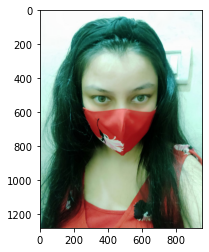

In [10]:
#Adaboost Sample Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('rfc_c_16.pbz2') 

load_clf = data

#get df from image

prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()




Identified: Sonia Laskar


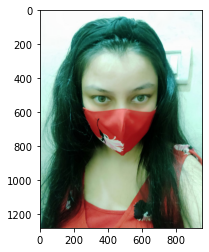

In [11]:
#Random Forest Sample Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('rfc_c_16_2.pbz2') 

load_clf = data

#cities = ['Shah Rukh Khan', 'Amitabh Bacchan','Kajol','Rani Mukherjee','Bobby Deol','Sunny Deol','Dharmendra','Abhay Deol','Hema Malini','Esha Deol','Ahana Deol','Karan Deol','Jaya Bacchan','Jeetendra','Ekta Kapoor','Tusshar Kapoor','Shaan Mukherjee','Udit Narayanan','Aditya Narayanan','Neha Kakkar','Alka Yagnik','Nora Fatehi','Madhuri Dixit','Aamir Khan','Kareena Kapoor','Karisma Kapoor','Randhir Kapoor','Babita Kapoor','Arijit Singh','Sanjay Leela Bhansali','Hrithik Roshan','Rakesh Roshan','Aditya Roy Kapoor','Siddharth Roy Kapoor','Vidya Balan','Amrita Singh','Sara Ali Khan','Saif Ali Khan','Sharmila Tagore','Rabindranath Tagore','Narendra Modi','Manmohan Singh','Rekha B','Shashi Kapoor','Zeenat Aman','Alia Bhatt','Varun Dhawan','Kiara Advani','Akshay Kumar','Twinkle Khanna','Dimple Kapadia','Kamal Hassan','Rajnikant','Ronit Roy','Rohit Roy','Karan Patel','Anita Hassnandani','Sachin Tendulkar','Virat Kohli','Anushka Sharma','Ritesh Deshmukh','Genelia Dsouza','Sourav Ganguly','Nagma','Mithun Chakraborty','Madhubala','Dilip Kumar','Raj Kapoor','Shammi Kapoor','Saira Banu','Mala Sinha','Shatrugan Sinha','Sonakshi Sinha','Deepika Padukone','Ranveer Singh','Anil Kapoor','Sonam Kapoor','Rhea Kapoor','Ajay Devgan','Nysa Devgan','Shakti Kapoor','Shraddha Kapoor','Disha Patani','Jackie Shroff','Tiger Shroff','Raveena Tandon','Rubina Dilak','Karan Johar','Helen Khan','Archana Puran Singh','Parmeet Sethi','Anupam Kher','Kiron Kher','Sikander Kher','Javed Jaffrey','Prem Chopra','Sanjay Dutt','Kapil Sharma','Kapil Dev','Sachin Tendulkar']

#cities = ['Shah Rukh Khan','Sonia Laskar','Preity Zinta','Bobby Deol']

#get df from image



prediction = load_clf.predict(df)
prediction_proba_2 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()





Identified: Sonia Laskar


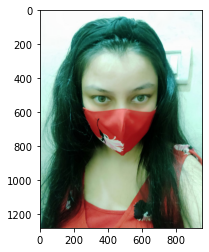

0.9983209
[[3.1904416e-05 9.9832088e-01 5.3807779e-04 5.0413939e-05 2.2164859e-04
  9.1373557e-05 1.4306969e-04 7.7253215e-05 4.3848959e-05 3.4995228e-05
  1.3040018e-04 6.2789230e-05 5.7477864e-05 6.6482404e-05 1.2933124e-04]]
Shah Rukh Khan 3.1904416e-05
Sonia Laskar 0.9983209
Preity Zinta 0.0005380778
Bobby Deol 5.041394e-05
Priyanka Chopra 0.00022164859
Angelina Jolie 9.137356e-05
Anne Hathaway 0.00014306969
Nicolas Cage 7.7253215e-05
Amitabh Bacchan 4.384896e-05
Brad Pitt 3.4995228e-05
Abhishek Bacchan 0.00013040018
Ananya Pandey 6.278923e-05
Saif Ali Khan 5.7477864e-05
Kareena Kapoor 6.6482404e-05
Malaika Arora 0.00012933124


In [12]:
#XGBoost Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('rfc_c_16_3.pbz2') 

load_clf = data

prediction = load_clf.predict(df)
prediction_proba_3 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()

r_prob_2 = prediction_proba_3[0][prediction[0]]
print(r_prob_2)
#print(prediction[0])
print(prediction_proba_3)

list_indx_3 = []
for i in range(len(prediction_proba_3[0])):
    if prediction_proba_3[0][i]>0:
        list_indx_3.append(i)
        
for i in list_indx_3:
    print(cities[i],prediction_proba_3[0][i])

Identified: Sonia Laskar


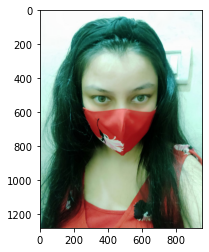

0.9992084
[[8.2756815e-05 9.9920839e-01 2.4329715e-05 4.7797956e-05 2.0809426e-04
  4.9176586e-05 5.7772078e-05 3.9370316e-05 3.5061261e-05 5.5402143e-05
  3.5005869e-05 3.0417483e-05 5.3170690e-05 2.9789155e-05 4.3465698e-05]]
Shah Rukh Khan 8.2756815e-05
Sonia Laskar 0.9992084
Preity Zinta 2.4329715e-05
Bobby Deol 4.7797956e-05
Priyanka Chopra 0.00020809426
Angelina Jolie 4.9176586e-05
Anne Hathaway 5.777208e-05
Nicolas Cage 3.9370316e-05
Amitabh Bacchan 3.506126e-05
Brad Pitt 5.5402143e-05
Abhishek Bacchan 3.500587e-05
Ananya Pandey 3.0417483e-05
Saif Ali Khan 5.317069e-05
Kareena Kapoor 2.9789155e-05
Malaika Arora 4.3465698e-05


In [13]:
#rfc_c_16_stacked_5_xg_stacked_FINAL


#Stacking Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('rfc_c_16_stacked_5_xg_stacked_FINAL.pbz2') 

load_clf = data

prediction = load_clf.predict(df)
prediction_proba_3 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()


r_prob_2 = prediction_proba_3[0][prediction[0]]
print(r_prob_2)
#print(prediction[0])
print(prediction_proba_3)

list_indx_3 = []
for i in range(len(prediction_proba_3[0])):
    if prediction_proba_3[0][i]>0:
        list_indx_3.append(i)
        
for i in list_indx_3:
    print(cities[i],prediction_proba_3[0][i])